<a href="https://colab.research.google.com/github/MJ199999/Car-Detecting/blob/main/Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive')
drive.mount('/content/drive')


Mounted at /gdrive
Mounted at /content/drive


In [2]:
import cv2
import matplotlib.pyplot as plt
import glob

In [3]:
!git clone https://github.com/AlexeyAB/darknet
%cd darknet
!make


Cloning into 'darknet'...
remote: Enumerating objects: 15521, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 15521 (delta 0), reused 5 (delta 0), pack-reused 15514
Receiving objects: 100% (15521/15521), 14.19 MiB | 17.92 MiB/s, done.
Resolving deltas: 100% (10412/10412), done.
/content/darknet
mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -rdynamic -Ofast -c ./src/image_opencv.cpp -o obj/image_opencv.o
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -rdynamic -Ofast -c ./src/http_stream.cpp -o obj/http_stream.o
./src/http_stream.cpp: In member function ‘bool JSON_sender::write(const char*)’:
./src/http_stream.cpp:253:21: warning: unused variable ‘n’ [-Wunused-variable]
  253 |                 int n = _write(client, outpu

In [4]:
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1' Makefile
!sed -i 's/LIBSO=0/LIBSO=1' Makefile

sed: -e expression #1, char 27: unterminated `s' command
sed: -e expression #1, char 17: unterminated `s' command


In [ ]:
# !cp /content/drive/MyDrive/test_jpg ./

In [5]:
!rm -rf data/obj
!mkdir data/obj
# !zip -FF Cars --out Cars_ver2.zip
!mv /content/drive/MyDrive/test_jpg/ data/obj

In [6]:
%%writefile data/obj.names
chevrolet_malibu_sedan_2012_2016
chevrolet_malibu_sedan_2017_2019
chevrolet_spark_hatchback_2016_2021
chevrolet_trailblazer_suv_2021_
chevrolet_trax_suv_2017_2019
genesis_g80_sedan_2016_2020
genesis_g80_sedan_2021_
genesis_gv80_suv_2020_
hyundai_avante_sedan_2011_2015
hyundai_avante_sedan_2020_
hyundai_grandeur_sedan_2011_2016
hyundai_grandstarex_van_2018_2020
hyundai_ioniq_hatchback_2016_2019
hyundai_sonata_sedan_2004_2009
hyundai_sonata_sedan_2010_2014
hyundai_sonata_sedan_2019_2020
kia_carnival_van_2015_2020
kia_carnival_van_2021_
kia_k5_sedan_2010_2015
kia_k5_sedan_2020_
kia_k7_sedan_2016_2020
kia_mohave_suv_2020_
kia_morning_hatchback_2004_2010
kia_morning_hatchback_2011_2016
kia_ray_hatchback_2012_2017
kia_sorrento_suv_2015_2019
kia_sorrento_suv_2020_
kia_soul_suv_2014_2018
kia_sportage_suv_2016_2020
kia_stonic_suv_2017_2019
renault_sm3_sedan_2015_2018
renault_xm3_suv_2020_
ssangyong_korando_suv_2019_2020
ssangyong_tivoli_suv_2016_2020

Writing data/obj.names


In [7]:
!cat data/obj.names

chevrolet_malibu_sedan_2012_2016
chevrolet_malibu_sedan_2017_2019
chevrolet_spark_hatchback_2016_2021
chevrolet_trailblazer_suv_2021_
chevrolet_trax_suv_2017_2019
genesis_g80_sedan_2016_2020
genesis_g80_sedan_2021_
genesis_gv80_suv_2020_
hyundai_avante_sedan_2011_2015
hyundai_avante_sedan_2020_
hyundai_grandeur_sedan_2011_2016
hyundai_grandstarex_van_2018_2020
hyundai_ioniq_hatchback_2016_2019
hyundai_sonata_sedan_2004_2009
hyundai_sonata_sedan_2010_2014
hyundai_sonata_sedan_2019_2020
kia_carnival_van_2015_2020
kia_carnival_van_2021_
kia_k5_sedan_2010_2015
kia_k5_sedan_2020_
kia_k7_sedan_2016_2020
kia_mohave_suv_2020_
kia_morning_hatchback_2004_2010
kia_morning_hatchback_2011_2016
kia_ray_hatchback_2012_2017
kia_sorrento_suv_2015_2019
kia_sorrento_suv_2020_
kia_soul_suv_2014_2018
kia_sportage_suv_2016_2020
kia_stonic_suv_2017_2019
renault_sm3_sedan_2015_2018
renault_xm3_suv_2020_
ssangyong_korando_suv_2019_2020
ssangyong_tivoli_suv_2016_2020


In [8]:
!cp data/obj.names data/coco.names

In [9]:
%%writefile data/obj.data
classes = 34
test = data/test.txt
names = /content/darknet/data/obj.names
backup = ./

Writing data/obj.data


In [10]:
!cat data/obj.data

classes = 34
test = data/test.txt
names = /content/darknet/data/obj.names
backup = ./


In [11]:
images_list_1 = glob.glob("data/obj/test_jpg/*[jpg|png|jpeg]")
print(images_list_1)
file = open("data/test.txt", "w") 
file.write("\n".join(images_list_1)) 
file.close() 

['data/obj/test_jpg/112917741.jpg', 'data/obj/test_jpg/121125904.jpg', 'data/obj/test_jpg/142801952.jpg', 'data/obj/test_jpg/140824390.jpg', 'data/obj/test_jpg/095850865.jpg', 'data/obj/test_jpg/134913511.jpg', 'data/obj/test_jpg/093300759.jpg', 'data/obj/test_jpg/112402265.jpg', 'data/obj/test_jpg/113012736.jpg', 'data/obj/test_jpg/165733655.jpg', 'data/obj/test_jpg/095904627.jpg', 'data/obj/test_jpg/154935720.jpg', 'data/obj/test_jpg/122215219.jpg', 'data/obj/test_jpg/165314347.jpg', 'data/obj/test_jpg/073836727.jpg', 'data/obj/test_jpg/121729012.jpg', 'data/obj/test_jpg/152107008.jpg', 'data/obj/test_jpg/084437814.jpg', 'data/obj/test_jpg/150325380.jpg', 'data/obj/test_jpg/164248107.jpg', 'data/obj/test_jpg/141435265.jpg', 'data/obj/test_jpg/142004404.jpg', 'data/obj/test_jpg/121711243.jpg', 'data/obj/test_jpg/181226913.jpg', 'data/obj/test_jpg/133153933.jpg', 'data/obj/test_jpg/154716185.jpg', 'data/obj/test_jpg/080119232.jpg', 'data/obj/test_jpg/141331169.jpg', 'data/obj/test_jpg/

In [12]:
!cat data/test.txt

data/obj/test_jpg/112917741.jpg
data/obj/test_jpg/121125904.jpg
data/obj/test_jpg/142801952.jpg
data/obj/test_jpg/140824390.jpg
data/obj/test_jpg/095850865.jpg
data/obj/test_jpg/134913511.jpg
data/obj/test_jpg/093300759.jpg
data/obj/test_jpg/112402265.jpg
data/obj/test_jpg/113012736.jpg
data/obj/test_jpg/165733655.jpg
data/obj/test_jpg/095904627.jpg
data/obj/test_jpg/154935720.jpg
data/obj/test_jpg/122215219.jpg
data/obj/test_jpg/165314347.jpg
data/obj/test_jpg/073836727.jpg
data/obj/test_jpg/121729012.jpg
data/obj/test_jpg/152107008.jpg
data/obj/test_jpg/084437814.jpg
data/obj/test_jpg/150325380.jpg
data/obj/test_jpg/164248107.jpg
data/obj/test_jpg/141435265.jpg
data/obj/test_jpg/142004404.jpg
data/obj/test_jpg/121711243.jpg
data/obj/test_jpg/181226913.jpg
data/obj/test_jpg/133153933.jpg
data/obj/test_jpg/154716185.jpg
data/obj/test_jpg/080119232.jpg
data/obj/test_jpg/141331169.jpg
data/obj/test_jpg/075704141.jpg
data/obj/test_jpg/111257750.jpg
data/obj/test_jpg/183433731.jpg
data/obj

In [ ]:
import os

# Path to Darknet executable
darknet_path = '/content/darknet/darknet'

# Path to data configuration file
data_file = '/content/darknet/data/obj.data'

# Path to YOLOv3 configuration file
config_file = '/content/drive/MyDrive/yolov3_custom.cfg'

# Path to trained weights file
weights_file = '/content/drive/MyDrive/yolov3_custom_last.weights'

# Path to the test image list file
test_list_file = '/content/darknet/data/test.txt'

# Path to directory containing test images
test_images_dir = '/content/drive/MyDrive/test_jpg/'

# Create output directory for detection results
output_dir = '/content/darknet/results/'
os.makedirs(output_dir, exist_ok=True)

# Read the test image list file
with open(test_list_file, 'r') as file:
    test_images = file.read().splitlines()

# Apply YOLOv3 to each test image
for image_path in test_images:
    image_name = os.path.basename(image_path)
    output_path = os.path.join(output_dir, image_name + '.txt')
    command = f'{darknet_path} detector test {data_file} {config_file} {weights_file} -ext_output {image_path} > {output_path}'
    os.system(command)


In [13]:
!./darknet detect /content/drive/MyDrive/yolov3_custom.cfg /content/drive/MyDrive/yolov3_custom_last.weights /content/darknet/data/obj/test_jpg/072050586.jpg

 GPU isn't used 
 OpenCV isn't used - data augmentation will be slow 
mini_batch = 1, batch = 32, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF
   9 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
  10 conv    128 

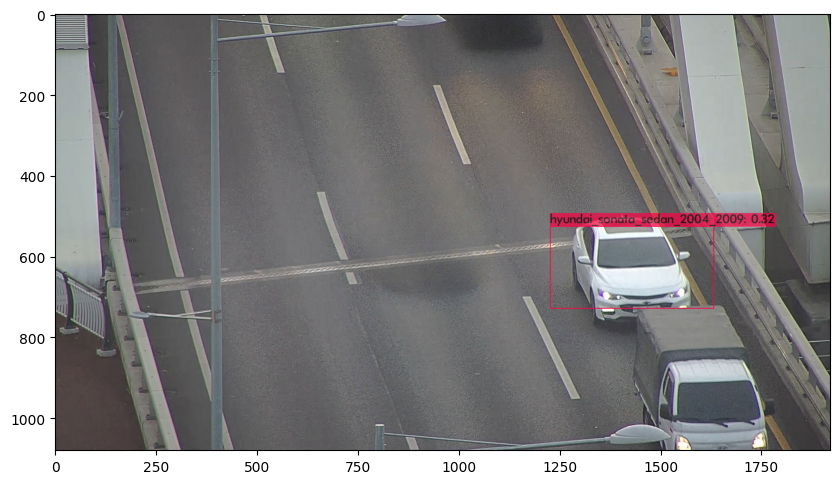

In [14]:
pred = plt.imread('predictions.jpg')
plt.figure(figsize=(10,10))
plt.imshow(pred)
plt.show()

In [16]:
!./darknet detector test /content/darknet/data/obj.data /content/drive/MyDrive/yolov3_custom_last.weights /content/darknet/data/obj/test_jpg -dont_show -ext_output -out /content/darknet/results

 GPU isn't used 
 OpenCV isn't used - data augmentation will be slow 
